# Dataset Preparation
   **In this projects, I use beautiful soup to web scrape movie dataset and do my own analysis**

In [1]:
from requests import get
url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'
response = get(url)
print(response.text[:500])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


In [2]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [3]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [4]:
first_movie = movie_containers[0]
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB470041630_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>
<p class="text-muted ">
<span class="certificate">R</span>
<span class="ghost">|</span>
<span class="runtime">137 min</span>
<span class="ghost">|</span>
<span class="genre">
Ac

In [5]:
first_movie.div

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>

Find the description of the first movie

In [6]:
first_movie.find_all('p')[1].text

'\n    In a future where mutants are nearly extinct, an elderly and weary Logan leads a quiet life. But when Laura, a mutant child pursued by scientists, comes to him for help, he must get her to safety.'

In [7]:
second_movie = movie_containers[1]
second_movie.find_all('p')[1].text

'\n    Thor (Chris Hemsworth) is imprisoned on the planet Sakaar, and must race against time to return to Asgard and stop Ragnarök, the destruction of his world, at the hands of the powerful and ruthless villain Hela (Cate Blanchett).'

In [8]:
first_name = first_movie.h3.a.text
first_name

'Logan'

In [9]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

<span class="lister-item-year text-muted unbold">(2017)</span>

In [10]:
first_year = first_year.text
first_year

'(2017)'

In [11]:
first_movie.strong


<strong>8.1</strong>

In [12]:
first_imdb = float(first_movie.strong.text)
first_imdb

8.1

In [13]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)

77


In [14]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

<span data-value="575221" name="nv">575,221</span>

In [15]:
first_votes = int(first_votes['data-value'])

some movies have no rating score

In [16]:
eighth_movie_mscore = movie_containers[22].find('div', class_ = 'ratings-metascore')
print(type(eighth_movie_mscore))


<class 'NoneType'>


In [17]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
descriptions = []
headers = {"Accept-Language": "en-US, en;q=0.5"}

# Extract data from individual movie container
for container in movie_containers:
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
# The name
        name = container.h3.a.text
        names.append(name)
# The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
# The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
# The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
# The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))
# The description
        description = container.find_all('p')[1].text
        descriptions.append(description)

In [18]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes,
'descriptions': descriptions
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
descriptions    43 non-null object
imdb            43 non-null float64
metascore       43 non-null int64
movie           43 non-null object
votes           43 non-null int64
year            43 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 2.1+ KB
None


,descriptions,imdb,metascore,movie,votes,year
0,\n In a future where mutants are nearly ext...,8.1,77,Logan,575221,(2017)
1,\n Thor (Chris Hemsworth) is imprisoned on ...,7.9,74,Thor: Ragnarok,506363,(2017)
2,\n The Guardians struggle to keep together ...,7.6,67,Guardians of the Galaxy Vol. 2,501462,(2017)
3,\n When a pilot crashes and tells of confli...,7.4,76,Wonder Woman,499346,(2017)
4,"\n Allied soldiers from Belgium, the Britis...",7.9,94,Dunkirk,479113,(2017)
5,\n Rey develops her newly discovered abilit...,7.1,85,Star Wars: Episode VIII - The Last Jedi,473952,(2017)
6,\n Peter Parker balances his life as an ord...,7.5,73,Spider-Man: Homecoming,450013,(2017)
7,\n A young African-American visits his whit...,7.7,84,Get Out,418144,(I) (2017)
8,\n A young blade runner's discovery of a lo...,8.0,81,Blade Runner 2049,389619,(2017)
9,"\n In the summer of 1989, a group of bullie...",7.4,69,It,382605,(I) (2017)


In [19]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

Now let's try scraping data from multiple pages

In [20]:
from time import sleep
from random import randint
from time import time; start_time = time()
from IPython.core.display import clear_output
from warnings import warn; warn("Warning Simulation")


/Users/samfeng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Warning Simulation
  """


In [21]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
descriptions = []
headers = {"Accept-Language": "en-US, en;q=0.5"}

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))
                # The description
                description = container.find_all('p')[1].text
                descriptions.append(description)

Request:72; Frequency: 0.0730318444296901 requests/s


In [22]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes,
'descriptions': descriptions
})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 6 columns):
descriptions    3276 non-null object
imdb            3276 non-null float64
metascore       3276 non-null int64
movie           3276 non-null object
votes           3276 non-null int64
year            3276 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 153.6+ KB
None


,descriptions,imdb,metascore,movie,votes,year
0,\n A former Roman General sets out to exact...,8.5,67,Gladiator,1230751,(2000)
1,\n A man with short-term memory loss attemp...,8.4,80,Memento,1043099,(2000)
2,"\n Unscrupulous boxing promoters, violent b...",8.3,55,Snatch,727791,(2000)
3,\n The drug-induced utopias of four Coney I...,8.3,68,Requiem for a Dream,709442,(2000)
4,\n In a world where mutants (evolved super-...,7.4,64,X-Men,542614,(2000)
5,\n A FedEx executive undergoes a physical a...,7.8,73,Cast Away,479238,(2000)
6,\n A wealthy New York City investment banki...,7.6,64,American Psycho,438262,(2000)
7,\n A man learns something extraordinary abo...,7.3,62,Unbreakable,359087,(2000)
8,\n Male nurse Greg Focker meets his girlfri...,7.0,73,Meet the Parents,295287,(2000)
9,\n I.M.F. Agent Ethan Hunt (Tom Cruise) is ...,6.1,59,Mission: Impossible II,294418,(2000)


In [23]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes', 'descriptions']]
movie_ratings.head()

,movie,year,imdb,metascore,votes,descriptions
0,Gladiator,(2000),8.5,67,1230751,\n A former Roman General sets out to exact...
1,Memento,(2000),8.4,80,1043099,\n A man with short-term memory loss attemp...
2,Snatch,(2000),8.3,55,727791,"\n Unscrupulous boxing promoters, violent b..."
3,Requiem for a Dream,(2000),8.3,68,709442,\n The drug-induced utopias of four Coney I...
4,X-Men,(2000),7.4,64,542614,\n In a world where mutants (evolved super-...


In [24]:
movie_ratings['year'].unique()


array(['(2000)', '(I) (2000)', '(2001)', '(2002)', '(2003)', '(2004)',
       '(I) (2004)', '(2005)', '(I) (2005)', '(2006)', '(I) (2006)',
       '(2007)', '(I) (2007)', '(2008)', '(I) (2008)', '(2009)',
       '(I) (2009)', '(2010)', '(I) (2010)', '(2011)', '(I) (2011)',
       '(2012)', '(I) (2012)', '(2013)', '(I) (2013)', '(2014)',
       '(I) (2014)', '(II) (2014)', '(2015)', '(I) (2015)', '(II) (2015)',
       '(2016)', '(II) (2016)', '(I) (2016)', '(IX) (2016)', '(2017)',
       '(I) (2017)'], dtype=object)

**Data Cleaning**

In [25]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]


,imdb,metascore
min,4.1,24.0
max,9.0,100.0


normalize the imdb column to a 100-points scale

In [26]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,descriptions,n_imdb
0,Gladiator,(2000),8.5,67,1230751,\n A former Roman General sets out to exact...,85.0
1,Memento,(2000),8.4,80,1043099,\n A man with short-term memory loss attemp...,84.0
2,Snatch,(2000),8.3,55,727791,"\n Unscrupulous boxing promoters, violent b...",83.0


# Data Exploration

In [35]:
# movie_ratings.to_csv('movie_ratings.csv')
import pandas as pd
movie_data = pd.read_csv('movie_ratings.csv')
movie_data.head()

,Unnamed: 0,movie,year,imdb,metascore,votes,descriptions,n_imdb
0,0,Gladiator,(2000),8.5,67,1230705,\n A former Roman General sets out to exact...,85.0
1,1,Memento,(2000),8.4,80,1043073,\n A man with short-term memory loss attemp...,84.0
2,2,Snatch,(2000),8.3,55,727766,"\n Unscrupulous boxing promoters, violent b...",83.0
3,3,Requiem for a Dream,(2000),8.3,68,709414,\n The drug-induced utopias of four Coney I...,83.0
4,4,X-Men,(2000),7.4,64,542597,\n In a world where mutants (evolved super-...,74.0


In [36]:
movie_data.shape

(3276, 8)

It containes 3276 rows and 8 columns; hence it should be a big enough sample size to do analysis

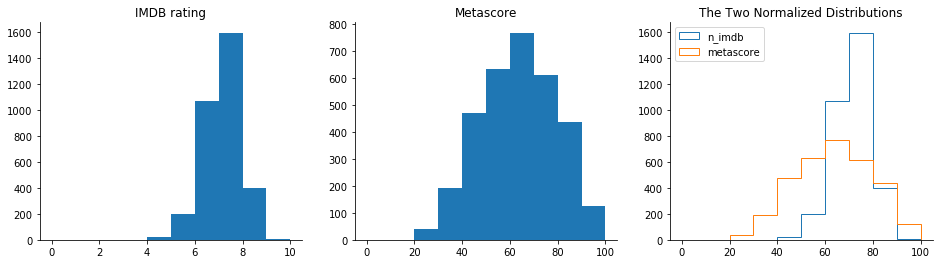

In [29]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

Let's divide movies into two groups. If its score is greater than 8, then we would say it is a good movie. Here, I use 1 as "good movie" and 0 as "Not good enough".

In [39]:
index = -1
for i in movie_data['imdb']:
    index += 1
    if i > 8:
        movie_data.at[index, 'good_bad_score'] = 1
    else:
        movie_data.at[index, 'good_bad_score'] = 0

In [40]:
movie_data['good_bad_score'][:20]
movie_data.head()

,Unnamed: 0,movie,year,imdb,metascore,votes,descriptions,n_imdb,good_bad_score
0,0,Gladiator,(2000),8.5,67,1230705,\n A former Roman General sets out to exact...,85.0,1.0
1,1,Memento,(2000),8.4,80,1043073,\n A man with short-term memory loss attemp...,84.0,1.0
2,2,Snatch,(2000),8.3,55,727766,"\n Unscrupulous boxing promoters, violent b...",83.0,1.0
3,3,Requiem for a Dream,(2000),8.3,68,709414,\n The drug-induced utopias of four Coney I...,83.0,1.0
4,4,X-Men,(2000),7.4,64,542597,\n In a world where mutants (evolved super-...,74.0,0.0


In [41]:
movie_data.isnull().sum()

Unnamed: 0        0
movie             0
year              0
imdb              0
metascore         0
votes             0
descriptions      0
n_imdb            0
good_bad_score    0
dtype: int64

In [53]:
movie_data['movie']

0                                              Gladiator
1                                                Memento
2                                                 Snatch
3                                    Requiem for a Dream
4                                                  X-Men
5                                              Cast Away
6                                        American Psycho
7                                            Unbreakable
8                                       Meet the Parents
9                                 Mission: Impossible II
10                            O Brother, Where Art Thou?
11                                    Gone in 60 Seconds
12                        Crouching Tiger, Hidden Dragon
13                                           The Patriot
14                                         Almost Famous
15                                           Scary Movie
16                                           Pitch Black
17                             

# Data Analysis using Regression

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib
import numpy as np

**Is the IMDB rating related to meta score and number of votes?**

In [43]:
Y = movie_data['n_imdb']
X = movie_data[['metascore', 'votes']]

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
Y_pred = regressor.predict(X_test)
print(Y_pred)

[63.3452609  74.26607233 68.16352129 67.32874274 72.514891   79.01802228
 66.96404418 67.32874274 76.38623128 63.66570619 69.70132767 78.17283375
 69.6688712  73.13860079 73.34545152 66.60311217 71.77684452 73.98975536
 75.67125246 71.38111761 68.24989856 65.36991787 65.42084177 73.97240822
 67.23944807 60.0632365  67.08038242 67.84887773 73.69300302 69.90590272
 95.74119382 63.80987292 65.953153   90.55953196 70.09622964 76.38933477
 67.32874274 74.0248167  74.38175498 74.72058094 71.84202411 70.46282627
 67.68154388 67.05892258 69.40886474 66.33957988 70.78436304 68.11110524
 67.72350473 85.29504652 64.67402568 73.52287822 70.38892423 75.51751766
 74.44771821 62.63057957 65.22853921 70.86998111 90.55953196 65.01023579
 79.06750523 74.44771821 79.86576977 71.67374828 65.96900788 74.13394333
 64.26868642 61.26139977 64.78442807 74.70429316 66.1523732  68.47218963
 72.05156401 62.10572377 68.81162381 69.70132767 67.70892891 83.49619439
 71.94779852 68.77285353 69.03655506 74.32620331 61

In [46]:
error_frame = pd.DataFrame({'Actual': np.array(Y_test).flatten(), 'Predicted': Y_pred.flatten()})
error_frame.head(10)

,Actual,Predicted
0,68.0,63.345261
1,74.0,74.266072
2,64.0,68.163521
3,64.0,67.328743
4,77.0,72.514891
5,78.0,79.018022
6,68.0,66.964044
7,64.0,67.328743
8,73.0,76.386231
9,55.0,63.665706


In [47]:
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((3276, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0,1,2]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 n_imdb   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2297.
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:58:18   Log-Likelihood:                -9777.4
No. Observations:                3276   AIC:                         1.956e+04
Df Residuals:                    3273   BIC:                         1.958e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9721      0.348    143.642      0.000      49.290      50.654
x1             0.2780      0.006     48.589      0.000       0.267       0.289
x2          1.076e-05      4e-07     26.878      0.000    9.97e-06    1.15e-05
==============================================================================
Omnibus:                      220.652   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.775
Skew:                          -0.402   Prob(JB):                    2.76e-117
Kurtosis:                       4.813   Cond. No.                     1.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Almost 60% R-squared indicates the correlation between dependent and independent variables.

# Analysis on Movies Reviews using NLP

**Can the description of the movie indicate whether a movie can be a good one? Maybe some word choices tend to attract more users and make them give higher ratings? Or some words choices can usually be seen in higher/lower rating movies?**

In [102]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samfeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Remove punctuation in the descriptions

In [103]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [104]:
movie_data['descriptions'] = movie_data['descriptions'].apply(remove_punctuation)
movie_data.head(10)

,Unnamed: 0,movie,year,imdb,metascore,votes,descriptions,n_imdb,good_bad_score
0,0,Gladiator,(2000),8.5,67,1230705,\n A former Roman General sets out to exact...,85.0,1.0
1,1,Memento,(2000),8.4,80,1043073,\n A man with shortterm memory loss attempt...,84.0,1.0
2,2,Snatch,(2000),8.3,55,727766,\n Unscrupulous boxing promoters violent bo...,83.0,1.0
3,3,Requiem for a Dream,(2000),8.3,68,709414,\n The druginduced utopias of four Coney Is...,83.0,1.0
4,4,X-Men,(2000),7.4,64,542597,\n In a world where mutants evolved superpo...,74.0,0.0
5,5,Cast Away,(2000),7.8,73,479211,\n A FedEx executive undergoes a physical a...,78.0,0.0
6,6,American Psycho,(2000),7.6,64,438231,\n A wealthy New York City investment banki...,76.0,0.0
7,7,Unbreakable,(2000),7.3,62,359058,\n A man learns something extraordinary abo...,73.0,0.0
8,8,Meet the Parents,(2000),7.0,73,295281,\n Male nurse Greg Focker meets his girlfri...,70.0,0.0
9,9,Mission: Impossible II,(2000),6.1,59,294398,\n IMF Agent Ethan Hunt Tom Cruise is sent ...,61.0,0.0


**Text Cleaning**

In [105]:
corpus = []
for i in range(0, 3276):
    descri = re.sub('[^a-zA-Z]', ' ', movie_data['descriptions'][i])
    descri = descri.lower()
    descri = descri.split()
    ps = PorterStemmer()
    descri = [ps.stem(word) for word in descri if not word in set(stopwords.words('english'))]
    descri =' '.join(descri)
    corpus.append(descri)
    

**Creating the Bag of Words Model**

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)
X = cv.fit_transform(corpus).toarray()
Y = movie_data['good_bad_score'].values

In [107]:
X.shape

(3276, 3000)

Looks like there are 4067 words in total, but let's filter the most common 3000 words in this case

**Split the Dataset into Training Set and Test Set**

In [108]:
from sklearn.cross_validation import train_test_split

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [110]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None)

In [111]:
Y_pred = classifier.predict(X_test)

In [112]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[597,   0],
       [  0,  59]])

But the accuracy seems too good, we need to examine our process again.